# Solving a Regression Problem (2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Data Example

In [2]:
dat=np.loadtxt(fname = 'regData1.txt', delimiter = ',')   ### 데이터 불러오기 (40, 2)

n_sample=dat.shape[0]   ### 데이터 길이 추출

np.random.seed(0)
rindex=np.random.permutation(n_sample)   ### 0~39까지랜덤 수 추출
print(rindex)

ncut=int(n_sample/4)   ### 40개의 1/4인 10개 계산  
print(ncut)

X_train=dat[rindex[: -ncut], 0].reshape(-1, 1)   ### Train, Test 분리
Y_train=dat[rindex[: -ncut], 1].reshape(-1, 1)   ### reshape()에서 -1은 나머지 숫자에 맞춰서 자동설정
X_test=dat[rindex[-ncut:], 0].reshape(-1, 1)
Y_test=dat[rindex[-ncut:], 1].reshape(-1, 1)

[22 20 25  4 10 15 28 11 18 29 27 35 37  2 39 30 34 16 36  8 13  5 17 14 33
  7 32  1 26 12 31 24  6 23 21 19  9 38  3  0]
10


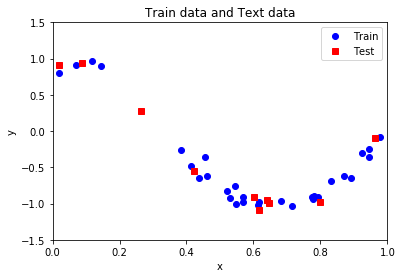

In [3]:
### 그래프 출력

plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.plot(X_train, Y_train, 'bo', label='Train')
plt.plot(X_test, Y_test, 'rs', label='Test')
plt.title('Train data and Text data')
plt.xlabel('x')
plt.ylabel('y')
_=plt.legend(loc='best')

### Linear Regression

In [4]:
class simpleNet:
    def __init__(self):
        self.W = np.random.rand(2, 1)
        
    def predict(self, x, W):
        return W[0]+x*W[1]
    
    def loss(self, x, t, W):
        y = self.predict(x, W)
        loss = np.mean((y-t)**2)
        return loss

In [5]:
linNet = simpleNet()
W_init = linNet.W.copy()
print(W_init)    

[[ 0.75861562]
 [ 0.10590761]]


In [6]:
ypred = linNet.predict(X_train, W_init)
errLoss = linNet.loss(X_train, Y_train, W_init)
print(errLoss)

2.11630055578


In [7]:
def grad_decent(x, y, iniW, lr, stepNum):
    W = iniW.copy()
    dW=np.zeros_like(W)
    for i in range(stepNum):
        ypred=linNet.predict(x, W)
        dW[0] = 2*np.mean(ypred-y)
        dW[1] = 2*np.mean((ypred-y)*x)
        W-=lr*dW
        
        return W

In [8]:
W = grad_decent(X_train, Y_train, W_init, 0.01, 5000)
print(W)
print(linNet.loss(X_train, Y_train, W))

[[ 0.73231814]
 [ 0.08809196]]
2.01679174336


In [9]:
linNet.loss(X_train, Y_train, W)

2.0167917433617322

In [10]:
xval = np.linspace(0, 1, 101).reshape(-1,1)
yval = W[0]*xval+W[1]

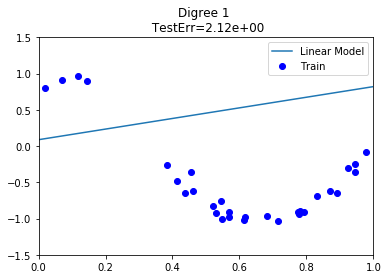

In [11]:
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.plot(xval, yval, label='Linear Model')
plt.plot(X_train, Y_train, 'bo', label='Train')
plt.legend(loc='best')
_=plt.title('Digree {} \n TestErr={:.2e}'.format(1, errLoss))